# Rotation Invariants

The recently proposed Rotation Invariants Features (RIF) *(Zucchelli et al. 2019)* stems from the Spherical Harmonics (SH) representation of a spherical function *f(u)* where the SH coefficients $c_{lm}$ can be calculated as
\begin{equation}
c_{lm} =   \int_{\mathbb{S}^2}   f(\textbf{u}) Y_l^m(\textbf{u}) d\textbf{u}
\end{equation}


The RIF can be derived from the SH coefficients as
\begin{equation}
I_{\textbf{l}}[f] = \sum_{m_1=-l_1}^{l_1} \cdots \sum_{m_d=-l_d}^{l_d} c_{l_1 m_1} \cdots  c_{l_d m_d} G(l_1,m_1 | \cdots | l_d,m_d)
\end{equation}
where $\textbf{l}=[l_1, \dots, l_d]$ are the SH degrees characterizing the considered invariant and $G$ are the real Gaunt coefficients as explained in *Homeier and Steinborn (1996)*


# Using Dmipy to calculate invariants

## Fitting SH to Human Connectome Project data

In [14]:
from dmipy.data import saved_data
scheme_hcp, data_hcp = saved_data.wu_minn_hcp_coronal_slice()
bvecs = scheme_hcp.gradient_directions
bvals = scheme_hcp.bvalues
print(data_hcp.shape)

This data slice originates from Subject 100307 of the Human Connectome Project, WU-Minn Consortium (Principal Investigators: David Van Essen and Kamil Ugurbil; 1U54MH091657) funded by the 16 NIH Institutes and Centers that support the NIH Blueprint for Neuroscience Research; and by the McDonnell Center for Systems Neuroscience at Washington University.
(145, 1, 145, 288)


Let's calculate the SH coefficients of the first shell of the HCP data:


In [20]:
import numpy as np
from dmipy.utils.invariants import fit_sh_to_data

sh_order = 4
x,y,z,d = data_hcp.shape

# n_c = number of SH coefficients
n_c = (sh_order+1)*(sh_order+2)//2

sh_coef_b = np.zeros((x,y,z,n_c))

# possible bvals are 1e09, 2e09, 3e09
shell_indices = bvals == 1e09

sh_coef_b = fit_sh_to_data(data_hcp[..., shell_indices], bvecs[shell_indices,:], sh_order=sh_order)


## Calculating the RIF from SH coefficients

Using dmipy it is possible to obtain the list of algebraically independent invariants given the SH order and to generate the corresponding RIF.

In [21]:
from dmipy.utils.invariants import get_invariants_list, get_invariants

rif_list = get_invariants_list(sh_order)
print(rif_list)

[[0], [2, 2], [4, 4], [2, 2, 2], [2, 2, 4], [2, 4, 4], [4, 4, 4], [2, 2, 2, 4], [2, 2, 4, 4], [2, 4, 4, 4], [4, 4, 4, 4], [2, 2, 2, 2, 4]]


In [22]:
# this operation may takes some time
invariants = get_invariants(sh_coef_b, rif_list)


We can visualize the invariants using matplotlib.

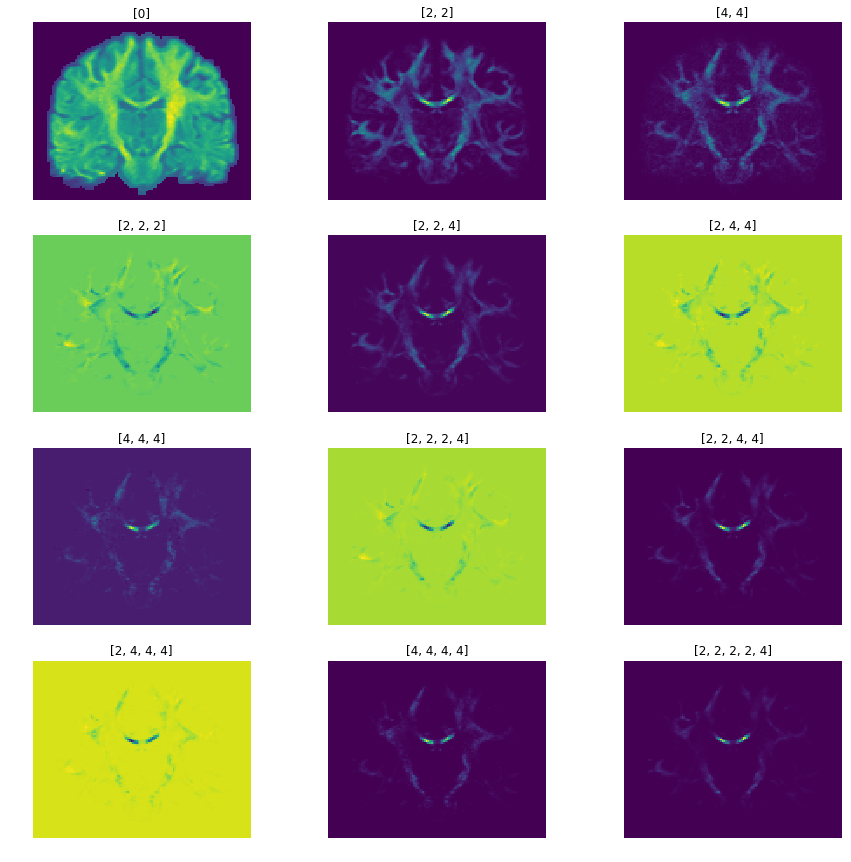

In [23]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 3, figsize=[15, 15])
axs = axs.ravel()

for i, l in enumerate(rif_list):
    axs[i].imshow(invariants[10:135,0,18:120,i].T, origin=True)
    axs[i].set_title(str(l))
    axs[i].set_axis_off()

## References
- Zucchelli, et al. [submitted]
- Homeier, Herbert HH, and E. Otto Steinborn. "Some properties of the coupling coefficients of real spherical harmonics and their relation to Gaunt coefficients." Journal of Molecular Structure: THEOCHEM 368 (1996): 31-37